In [32]:
import pandas as pd
import nltk
from textblob import TextBlob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [2]:
data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\raw_analyst_ratings.csv")

In [3]:
data.rename(columns={"date": "Date"}, inplace=True)

In [4]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
data['Date'] = data['Date'].str.split(' ').str[0]


In [6]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


In [7]:

company_to_filter = 'AMZN'
data_filtered =data[data['stock'] == company_to_filter]

In [8]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
76177,76869,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,AMZN
76178,76870,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AMZN
76179,76871,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AMZN
76180,76872,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10,AMZN
76181,76873,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10,AMZN


In [9]:
# Function to get the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [10]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
76177,76869,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,AMZN
76178,76870,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AMZN
76179,76871,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AMZN
76180,76872,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10,AMZN
76181,76873,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10,AMZN


In [11]:
data_filtered.loc[:, 'sentiment'] = data_filtered['headline'].apply(get_sentiment)

C:\Users\befekadum\AppData\Local\Temp\ipykernel_28736\1231557142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'sentiment'] = data_filtered['headline'].apply(get_sentiment)


In [12]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock,sentiment
76177,76869,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,AMZN,0.000000
76178,76870,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AMZN,0.433333
76179,76871,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AMZN,0.500000
76180,76872,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10,AMZN,0.227273
76181,76873,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10,AMZN,0.068182


In [13]:
data_filtered[['Date', 'headline', 'sentiment']].head()

,Date,headline,sentiment
76177,2020-06-10,How Cannabis Company Cannaphyll Is Marketing O...,0.000000
76178,2020-06-10,Tech Stocks And FAANGS Strong Again To Start D...,0.433333
76179,2020-06-10,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",0.500000
76180,2020-06-10,"Hearing Vertical Group Out Positive On Amazon,...",0.227273
76181,2020-06-10,Big Tech Reaches New Record Heights At The Sto...,0.068182


In [14]:
new_data_filtered = data_filtered.loc[:, ['Date', 'sentiment']]
new_data_filtered.head()

,Date,sentiment
76177,2020-06-10,0.000000
76178,2020-06-10,0.433333
76179,2020-06-10,0.500000
76180,2020-06-10,0.227273
76181,2020-06-10,0.068182


In [15]:
stock_data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\data\AMZN_historical_data.csv")

In [16]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [17]:
#stock_data= stock_data.index
new_stock_data=pd.DataFrame(stock_data, columns=['Date','Close'])

In [18]:
new_stock_data.head()

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354


In [19]:
#print(new_data_filtered['Date'].min(), new_data_filtered['Close'].max())
#print(stock_data.index.min(), stock_data.index.max())

In [20]:
print(new_stock_data.columns)

Index(['Date', 'Close'], dtype='object')


In [21]:
# Aligning sentiment scores with the stock closing prices on the same date
#new_data_filtered= 
#new_stock_data = 
combined_data= new_data_filtered.set_index('Date').join(new_stock_data.set_index('Date'))
#combined_data.head()

In [22]:
print(new_stock_data[['Close']])

           Close
0       0.097917
1       0.086458
2       0.085417
3       0.081771
4       0.071354
...          ...
6841  180.830002
6842  179.850006
6843  182.500000
6844  183.199997
6845  181.710007

[6846 rows x 1 columns]


In [23]:
combined_data.head()

,sentiment,Close
Date,,
2020-06-10,0.000000,132.372498
2020-06-10,0.433333,132.372498
2020-06-10,0.500000,132.372498
2020-06-10,0.227273,132.372498
2020-06-10,0.068182,132.372498


In [24]:
combined_data.tail()

,sentiment,Close
Date,,
2020-04-27,-0.25,118.800003
2020-04-27,0.00,118.800003
2020-04-27,0.40,118.800003
2020-04-27,0.00,118.800003
2020-04-27,0.10,118.800003


In [25]:
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

C:\Users\befekadum\AppData\Local\Temp\ipykernel_28736\707584225.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [26]:
correlation = combined_data['sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation)

Correlation between sentiment and daily stock returns: -0.0162643581827029


In [27]:
correlation = combined_data['sentiment'].corr(combined_data['Close'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: 0.0861679165553202


In [28]:
# Calculate daily returns (percentage change in closing price)
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

# Drop any rows with NaN values (e.g., the first row after pct_change)
#combined_data.dropna(inplace=True)

C:\Users\befekadum\AppData\Local\Temp\ipykernel_28736\3748235246.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [29]:
correlation_matrix = combined_data.corr()

In [30]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               sentiment     Close  Daily Returns
sentiment       1.000000  0.086168      -0.016264
Close           0.086168  1.000000       0.038329
Daily Returns  -0.016264  0.038329       1.000000


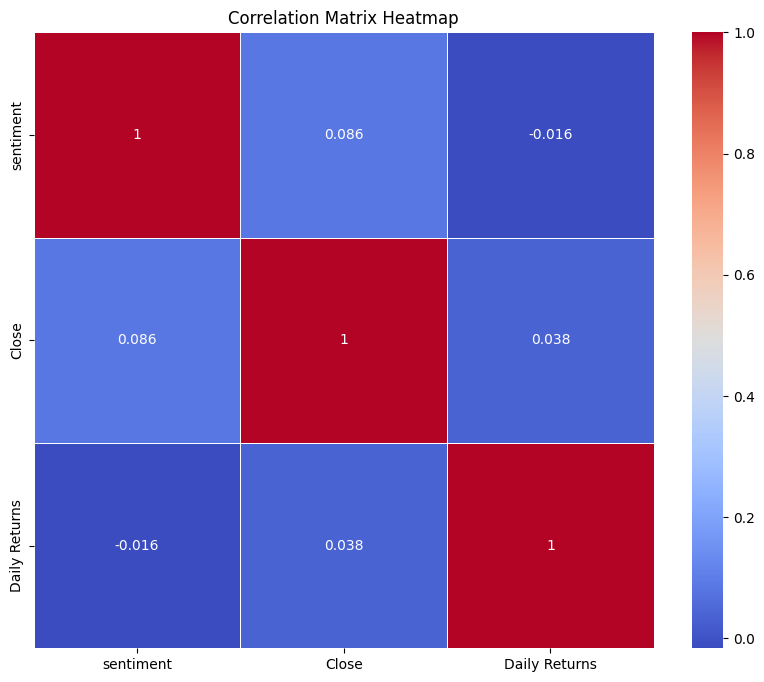

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()